In [1]:
from fimdpenv import setup
setup()

## UUV Interface Demo

This section demonstrates the code to create snapshots of interesting events based on the observed animation. We first create a scenario of interest and create a counter strategy using desired solver and objective. 

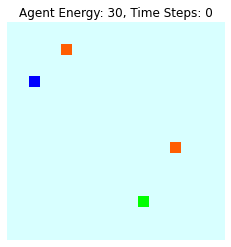

In [2]:
# create environment
from uuvmodel import create_env
env = create_env('2R-1T-simple', capacity=30)
env

* <font color='blue'>Blue Cell</font>: Current location of the agent
* <font color='gray'>Gray Cells</font>: Trajectory of the agent
* <font color='green'>Green Cells</font>: Target States
* <font color='orange'>Orange Cells</font>: Reload states

In [16]:
from fimdp.energy_solvers import GoalLeaningES, BasicES
from fimdp.objectives import AS_REACH, BUCHI, MIN_INIT_CONS, POS_REACH, SAFE
env.create_counterstrategy(solver=GoalLeaningES, objective=BUCHI, threshold=0.6)

In [17]:
# animate the simulation from created strategy
from uuvmodel import animate_simulation
anim, im_history, energy_history = animate_simulation(env, num_steps=100)
anim

The animate_simulation function above is different from the animate_simulation method available in SingleAgentEnv class. This function, defined in uuvmodel.py, returns the animation, state data, and energy data to help with creating static plots of events of interest. To create these plots, observe the animation above and note down the time steps for frames that one intends to see in the static plot. These time steps can be enteres in the visualize_snapshots function below which creates a figure with subplots showing all the snapshots. 

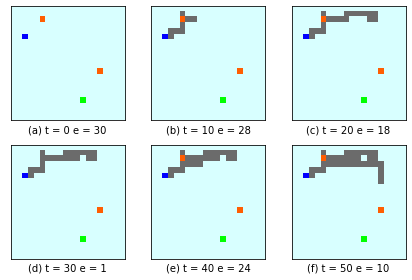

In [22]:
# create snapshots with even number of snapshot indices
from uuvmodel import visualize_snapshots
visualize_snapshots(im_history, energy_history, snapshots_indices=[0, 10, 20, 30, 40, 50], annotate=True, filename='uuvenv_illustration')


# Quantify the effect of GoalLeaning Heuristics

In this section, we try to quantify the effect of goalleaning heuristic on the improvement in mission performance. Specifically, we try to calculate the expected time steps to reach a target in a specific environment for both GoalLeaningES solver and BasicES solver and support the results obtained in this study with instances showing behavior of the agent leading to a near-optimal behavior.

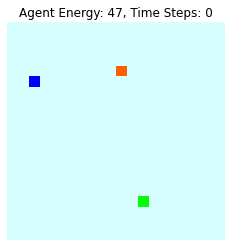

In [17]:
# create test environment
from uuvmodel import create_env
env = create_env('1R-1T-simple', capacity=47)
env

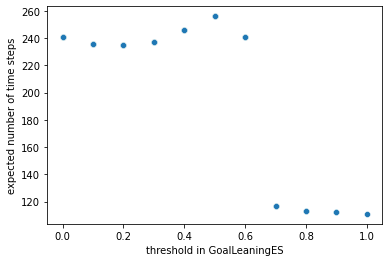

In [33]:
# calculate and plot expected time for different thresholds in GoalLeaning solver
import numpy as np
from uuvmodel import calc_exptimetotarget
threshold_list = np.linspace(0,1,11)
calc_exptimetotarget(env, threshold_list, num_runs=1000)

### Comparison - BasicES, GoalLeaningES, and GoalLeaningES with threshold

In [18]:
# visualize BasicES and GoalLeaningES
from fimdpenv import setup
setup()
from uuvmodel import animate_simulation
from fimdp.energy_solvers import GoalLeaningES, BasicES
from fimdp.objectives import AS_REACH, BUCHI, MIN_INIT_CONS, POS_REACH, SAFE

In [19]:
# BasicES
env.create_counterstrategy(solver=BasicES, objective=BUCHI)
anim, im_basic, energy_basic = animate_simulation(env, num_steps=100)
anim

In [27]:
# GoalLeaningES with threshold = 0
env.create_counterstrategy(solver=GoalLeaningES, objective=BUCHI, threshold=0)
anim, im_gl00, energy_gl00 = animate_simulation(env, num_steps=100)
anim

In [30]:
# GoalLeaningES with threshold = 0.1
env.create_counterstrategy(solver=GoalLeaningES, objective=BUCHI, threshold=0.1)
anim, im_gl01, energy_gl01 = animate_simulation(env, num_steps=100)
anim

In [31]:
# GoalLeaningES with threshold = 1
env.create_counterstrategy(solver=GoalLeaningES, objective=BUCHI, threshold=1)
anim, im_gl1, energy_gl1 = animate_simulation(env, num_steps=100)
anim

## Extracting snapshots of different solvers for the paper

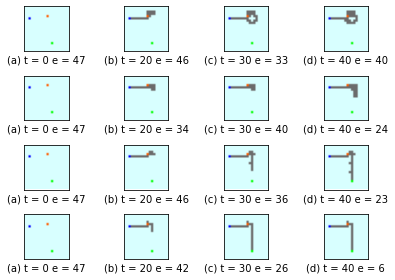

In [38]:
from uuvmodel import visualize_multisnapshots

im_history = [im_basic, im_gl00, im_gl01, im_gl1]
energy_history = [energy_basic, energy_gl00, energy_gl01, energy_gl1]
snapshot_indices = [[0, 20, 30, 40],[0, 20, 30, 40],[0, 20, 30, 40], [0, 20, 30, 40]]
visualize_multisnapshots(im_history, energy_history, snapshots_indices=snapshot_indices, annotate=True, filename='comparison')